<h2 style="text-align:left">Thivanka M H J</h2><h2>174176N</h2><br/>

<h1>Support Vctor Machine (SVM) for Banking-Marekting Dataset</h1><br/>

<Strong>Link to blog : <a>https://medium.com/@JayashanThivanka/build-a-support-vector-machine-svm-for-a-banking-marketing-dataset-bb3b28bb9bbb</a></Strong><br/><br/>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

<h5>Load the dataset</h5><br/>

In [2]:
df = pd.read_csv('banking.csv')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

<h5>Check null values</h5>

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

<h5>Check not unique value count</h5>

In [6]:
print(df.nunique())

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp_var_rate        10
cons_price_idx      26
cons_conf_idx       26
euribor3m          316
nr_employed         11
y                    2
dtype: int64


In [7]:
df = df.drop('duration', 1)

In [8]:
df = df.drop(['day_of_week'], 1)

In [9]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


In [10]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

<h1>Handeling Outliers</h1>

<h4>Get the continous data features to a seperate dataframe</h4>

In [11]:
df_continous = df.select_dtypes(include = np.number)
df_continous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp_var_rate    41188 non-null  float64
 5   cons_price_idx  41188 non-null  float64
 6   cons_conf_idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr_employed     41188 non-null  float64
 9   y               41188 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


<h5>Get categorical features into seperate data frame</h5>

In [12]:
df_categorical = df.select_dtypes(include = np.object)
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        41188 non-null  object
 1   marital    41188 non-null  object
 2   education  41188 non-null  object
 3   default    41188 non-null  object
 4   housing    41188 non-null  object
 5   loan       41188 non-null  object
 6   contact    41188 non-null  object
 7   month      41188 non-null  object
 8   poutcome   41188 non-null  object
dtypes: object(9)
memory usage: 2.8+ MB


<AxesSubplot:>

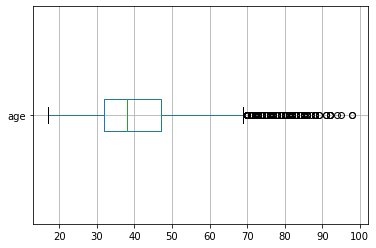

In [13]:
df_continous.boxplot(column=['age'],vert = False)

<AxesSubplot:>

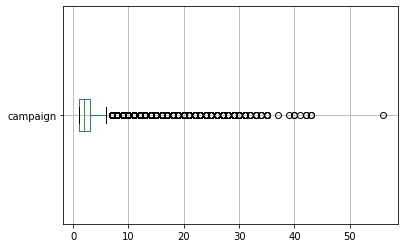

In [14]:
df_continous.boxplot(column=['campaign'],vert = False)

<h5>Here we can see that there are outliers in campaign clearly from above boxplot</h5>

Before Shape: (41188, 10)
After Shape: (41187, 10)


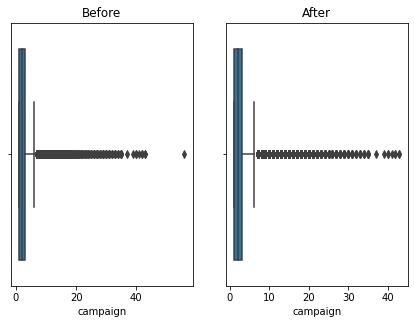

In [15]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)


print("Before Shape:",df_continous.shape)

#select values less than 50
df_temp = df_continous[(df_continous['campaign'] < 50)]
print("After Shape:",df_temp.shape)

sns.boxplot(df['campaign'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_temp['campaign'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

df_continous = df_temp

<AxesSubplot:>

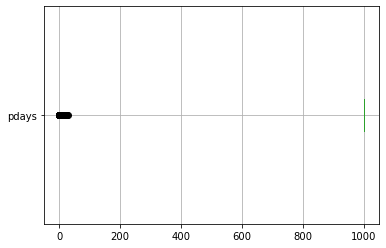

In [16]:
df_continous.boxplot(column=['pdays'],vert=False)

<AxesSubplot:>

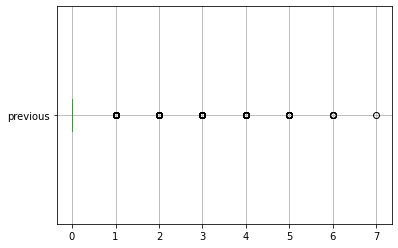

In [17]:
df_continous.boxplot(column=['previous'],vert=False)

<AxesSubplot:>

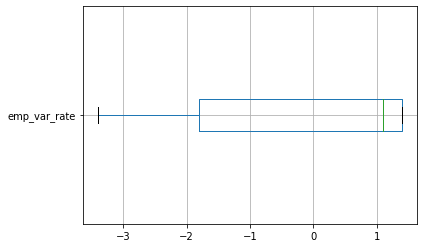

In [18]:
df_continous.boxplot(column=['emp_var_rate'],vert=False)

<AxesSubplot:>

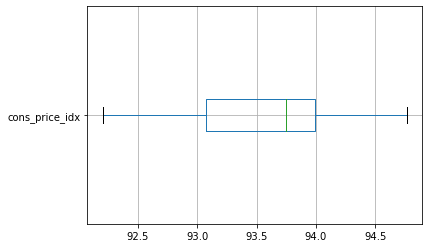

In [19]:
df_continous.boxplot(column=['cons_price_idx'],vert=False)

<AxesSubplot:>

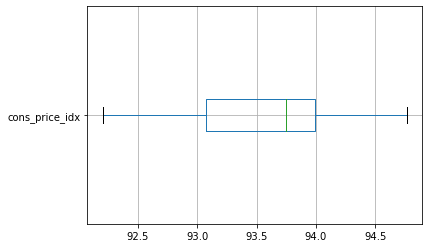

In [20]:
df_continous.boxplot(column=['cons_price_idx'],vert=False)

<AxesSubplot:>

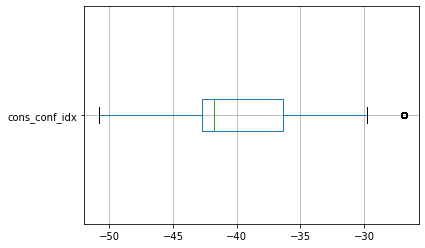

In [21]:
df_continous.boxplot(column=['cons_conf_idx'],vert=False)

Before Shape: (41187, 10)
After Shape: (40740, 10)


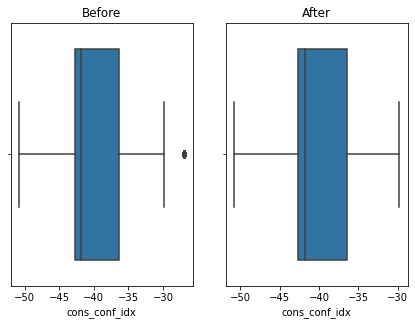

In [22]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)


print("Before Shape:",df_continous.shape)

#select values less than 50
df_temp = df_continous[(df_continous['cons_conf_idx'] < -27)]
print("After Shape:",df_temp.shape)

sns.boxplot(df['cons_conf_idx'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df_temp['cons_conf_idx'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

df_continous = df_temp

In [23]:
# cols = ['cons_conf_idx']    

# df_temp = df_continous
# for col in cols:

#     fig, axes = plt.subplots(1,2)
#     plt.tight_layout(0.2)
#     print("Previous Shape With Outlier: ",df_temp.shape)
#     sns.boxplot(df_temp[col],orient='v',ax=axes[0])
#     axes[0].title.set_text("Before")
    
#     Q1 = df_temp[col].quantile(0.25)
#     Q3 = df_temp[col].quantile(0.75)
#     print(Q1,Q3)
#     IQR = Q3-Q1
#     print(IQR)

#     lower_limit = Q1 - 1.5*IQR
#     upper_limit = Q3 + 1.5*IQR
#     print(lower_limit,upper_limit)

#     df_temp[col] = np.where(df_temp[col]>upper_limit,upper_limit,df_temp[col])
#     df_temp[col] = np.where(df_temp[col]<lower_limit,lower_limit,df_temp[col])
#     print("Shape After Removing Outliers:", df_temp.shape)
#     sns.boxplot(df_temp[col],orient='v',ax=axes[1])
#     axes[1].title.set_text("After")
#     df_continous[col] = df_temp[col]
#     plt.show()

<AxesSubplot:>

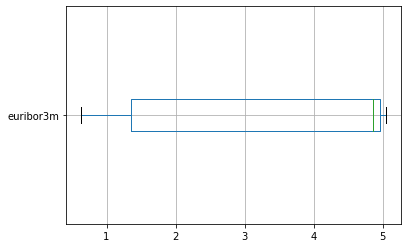

In [24]:
df_continous.boxplot(column=['euribor3m'],vert=False)

<AxesSubplot:>

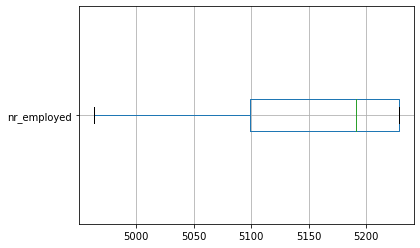

In [25]:
df_continous.boxplot(column=['nr_employed'],vert=False) 

<h1>Produce Q-Q Plots</h1>

age


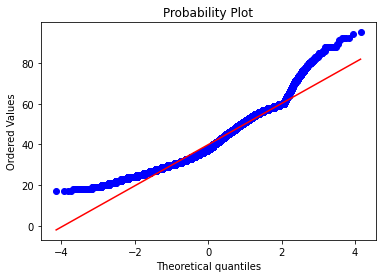

campaign


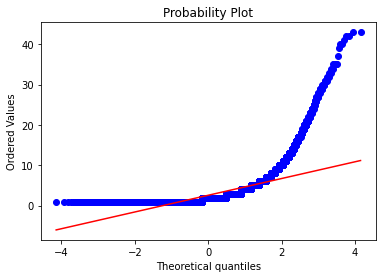

pdays


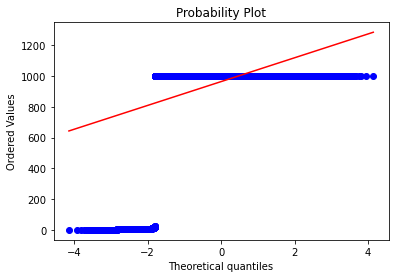

previous


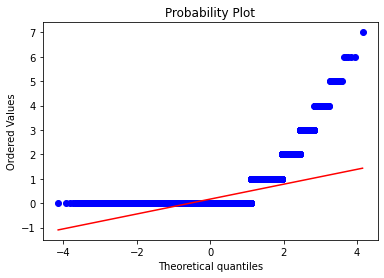

emp_var_rate


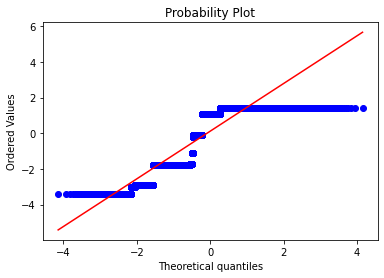

cons_price_idx


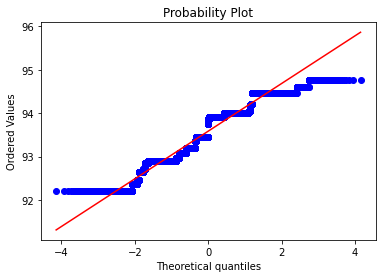

cons_conf_idx


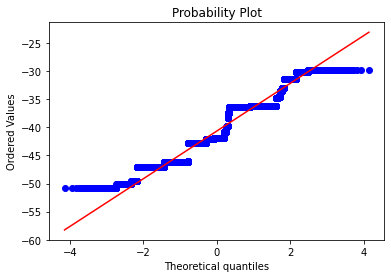

euribor3m


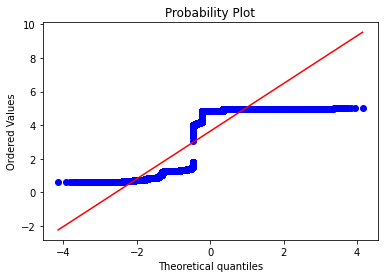

nr_employed


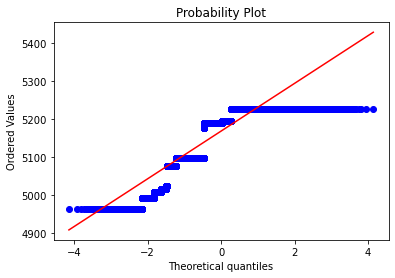

y


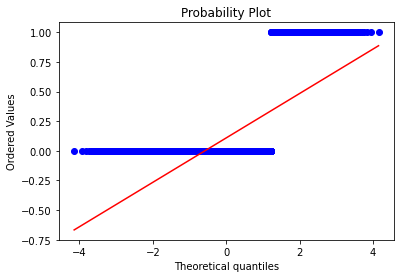

In [26]:
import scipy.stats as stats

columns = df_continous.columns

for col in columns:
  print(col)
  stats.probplot(df_continous[col], dist="norm", plot=plt)
  plt.show()

<h1>Produce Hoistograms</h1>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>],
       [<AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr_employed'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

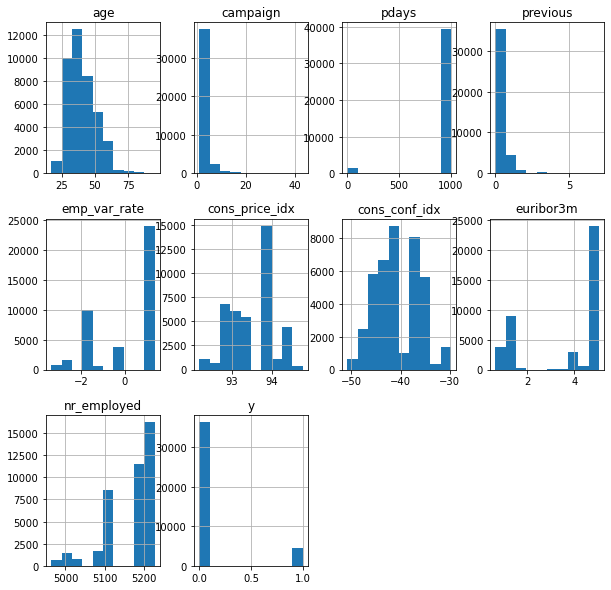

In [27]:
df_continous.hist(layout=(3,4), figsize=(10,10))

<h2>Apply Transformations</h2>

<h4>Age,campaign and previous are right skewed</h4>

age


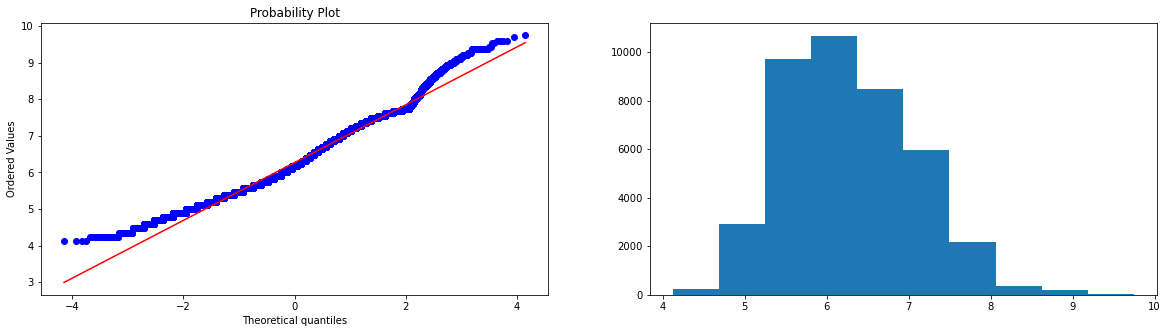

campaign


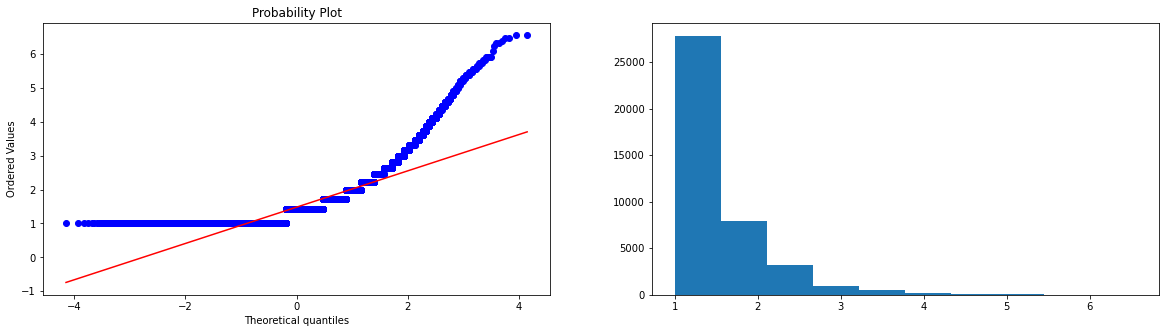

previous


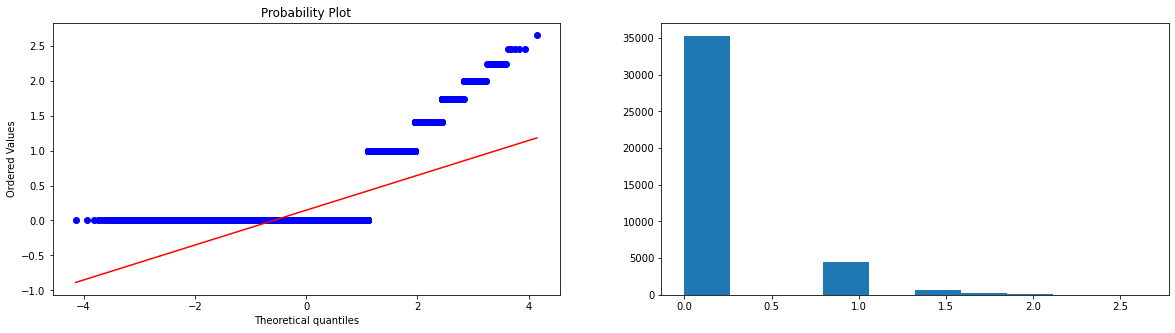

In [28]:
from sklearn.preprocessing import FunctionTransformer

sqrt_transformer=FunctionTransformer(np.sqrt,validate=True)

sqrt_cols=['age','campaign','previous']
transformed=sqrt_transformer.transform(df_continous[sqrt_cols])

for index,col in enumerate(sqrt_cols):
    df_continous[col]=transformed[:,index]
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
    print(col)
    stats.probplot(df_continous[col], dist="norm", plot=axes[0])
    axes[1].hist(df_continous[col])
    plt.show()

<h3>nr_employed is left skwed<br/></h3>

In [29]:
columns = ['nr_employed']
exp_transformer = FunctionTransformer(lambda x:x**2, validate=True)
to_left_skewed = exp_transformer.transform(df_continous[columns])
df_continous['nr_employed'] = to_left_skewed[:, 0]

<h5>use expotentoial transform to remove skewness</h5>

nr_employed


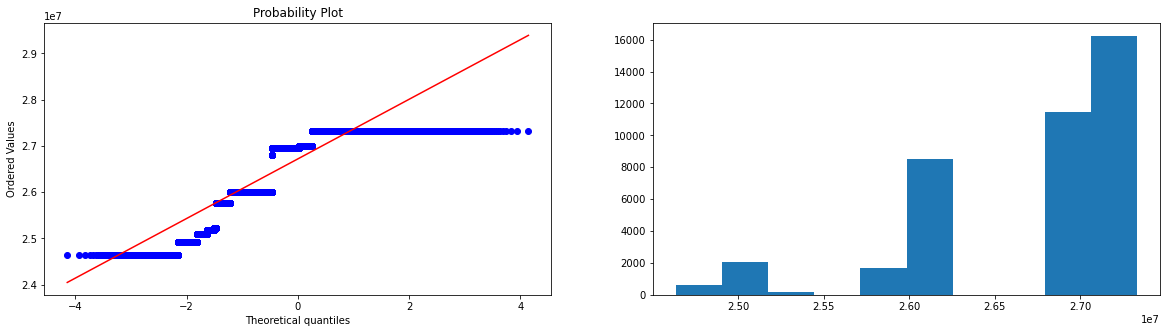

In [30]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
print('nr_employed')
stats.probplot(df_continous['nr_employed'], dist="norm", plot=axes[0])
axes[1].hist(df_continous['nr_employed'])
plt.show()

In [31]:
df_continous

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,6.633250,1.000000,999,0.000000,1.4,93.444,-36.1,4.963,27333029.61,0
1,7.280110,1.000000,999,0.000000,-0.1,93.200,-42.0,4.021,26996337.64,0
2,5.291503,1.732051,6,1.414214,-1.7,94.055,-39.8,0.729,24916070.56,1
3,6.244998,1.414214,999,0.000000,-1.8,93.075,-47.1,1.405,26000820.81,0
4,7.416198,1.000000,3,1.000000,-2.9,92.201,-31.4,0.869,25767806.44,1
...,...,...,...,...,...,...,...,...,...,...
41182,4.898979,2.000000,999,1.000000,-1.8,92.893,-46.2,1.266,26000820.81,0
41183,7.681146,1.000000,999,0.000000,1.4,94.465,-41.8,4.866,27333029.61,0
41184,5.567764,1.414214,999,0.000000,1.1,93.994,-36.4,4.860,26946481.00,0
41185,6.480741,1.732051,999,0.000000,1.1,93.994,-36.4,4.857,26946481.00,0


<h1>Feature coding techniques</h1>

In [32]:
df_categorical.nunique()

job          12
marital       4
education     8
default       3
housing       3
loan          3
contact       2
month        10
poutcome      3
dtype: int64

<h5>Apply label encoding for contact</h5>

In [33]:
df_contact_labled = pd.DataFrame(df_categorical['contact'],columns = ['contact'])
df_contact_labled['contact'] = df_categorical['contact'].astype('category').cat.codes
df_contact_labled.head(5)

,contact
0,0
1,0
2,0
3,0
4,0


<h5>Apply one-hot encoding for job,material,education,default,housing,loan,month,poutcome</h5>

In [34]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

cols = ['job','marital','education','default','housing','loan','month','poutcome']

# We fitting only training data
enc.fit(df_categorical[cols])
colnames = enc.get_feature_names()

df_onehot_encoded = pd.DataFrame(enc.transform(df_categorical[cols]).toarray(),columns = colnames)

df_labeled= pd.concat([df_contact_labled,df_onehot_encoded], axis=1, join="inner")

In [35]:
df_labeled.head()

,contact,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,...,x6_jul,x6_jun,x6_mar,x6_may,x6_nov,x6_oct,x6_sep,x7_failure,x7_nonexistent,x7_success
0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h1>Scale and/or standardized the features</h1>

<h5><br/>Seperate Dicrete data before scaling<br/></h5>

In [36]:
df_discrete = df_continous[['age', 'y']]
df_discrete

,age,y
0,6.633250,0
1,7.280110,0
2,5.291503,1
3,6.244998,0
4,7.416198,1
...,...,...
41182,4.898979,0
41183,7.681146,0
41184,5.567764,0
41185,6.480741,0


<h2>Standerlize</h2>

In [37]:
from sklearn.preprocessing import StandardScaler

df_to_standerlize=df_continous.drop(['age','y'],1)


# Removing Categorical Features before the feature scaling
columns = df_to_standerlize.columns
# Continous col
columns_cont = np.delete(columns,np.s_[9:])
# Categorical col
categorical_data = np.delete(columns,np.s_[0:9])

# Applying Standardization 
# Init StandardScaler
scaler = StandardScaler() 

#Transformation of training dataset features
standerlize_except = pd.DataFrame(df_to_standerlize, columns = columns)
scaler.fit(standerlize_except)
df_temp=pd.DataFrame(scaler.transform(standerlize_except), columns = columns)

df_standerlized=pd.concat([df_discrete,df_temp],axis=1,join='inner')


df_standerlized.head(2)

,age,y,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,6.63325,0,-0.78043,0.191417,-0.383474,0.833081,-0.253281,1.028119,0.762898,0.842105
1,7.28011,0,-0.78043,0.191417,-0.383474,-0.143234,-0.681817,-0.304475,0.214342,0.379417


In [38]:
df_standerlized

,age,y,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,6.633250,0,-0.780430,0.191417,-0.383474,0.833081,-0.253281,1.028119,0.762898,0.842105
1,7.280110,0,-0.780430,0.191417,-0.383474,-0.143234,-0.681817,-0.304475,0.214342,0.379417
2,5.291503,1,0.404871,-5.224430,3.297172,-1.184638,0.819815,0.192424,-1.702691,-2.479326
3,6.244998,0,-0.109756,0.191417,-0.383474,-1.249725,-0.901354,-1.456379,-1.309035,-0.988642
4,7.416198,1,-0.780430,-5.240793,2.219136,-1.965690,-2.436356,2.089676,-1.621164,-1.308855
...,...,...,...,...,...,...,...,...,...,...
40735,5.477226,0,0.838721,0.191417,2.219136,-1.249725,-1.221000,-1.253102,-1.389979,-0.988642
40736,7.071068,0,-0.780430,0.191417,-0.383474,0.833081,1.539896,-0.259303,0.706412,0.842105
40737,5.477226,1,-0.109756,0.191417,-0.383474,0.637818,0.712681,0.960360,0.702918,0.310903
40738,6.164414,0,0.404871,0.191417,-0.383474,0.637818,0.712681,0.960360,0.701171,0.310903


<h3>Before Standerlize</h3>

array([[<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>],
       [<AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

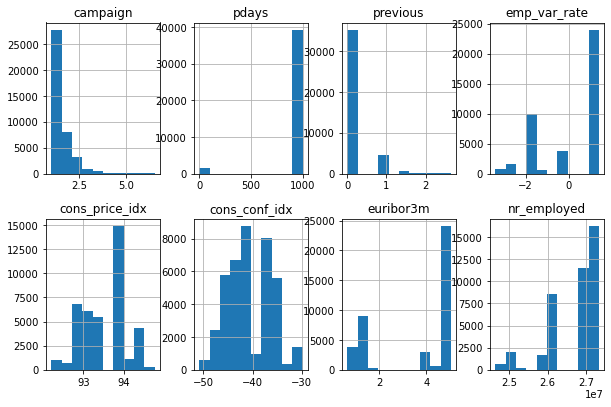

In [39]:
df_to_standerlize.hist(layout=(3,4), figsize=(10,10))

<h3>After Standerlize</h3>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>],
       [<AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

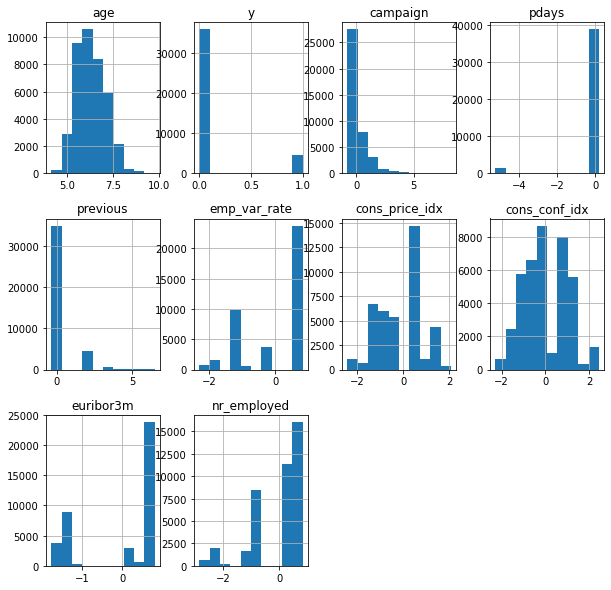

In [40]:
df_standerlized.hist(layout=(3,4), figsize=(10,10))

<h1>Joining continous features and categorical features</h1>

In [41]:
df_new=pd.concat([df_standerlized,df_labeled],axis=1,join='inner')
df_new

,age,y,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,x6_jul,x6_jun,x6_mar,x6_may,x6_nov,x6_oct,x6_sep,x7_failure,x7_nonexistent,x7_success
0,6.633250,0,-0.780430,0.191417,-0.383474,0.833081,-0.253281,1.028119,0.762898,0.842105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7.280110,0,-0.780430,0.191417,-0.383474,-0.143234,-0.681817,-0.304475,0.214342,0.379417,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5.291503,1,0.404871,-5.224430,3.297172,-1.184638,0.819815,0.192424,-1.702691,-2.479326,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6.244998,0,-0.109756,0.191417,-0.383474,-1.249725,-0.901354,-1.456379,-1.309035,-0.988642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,7.416198,1,-0.780430,-5.240793,2.219136,-1.965690,-2.436356,2.089676,-1.621164,-1.308855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40735,5.477226,0,0.838721,0.191417,2.219136,-1.249725,-1.221000,-1.253102,-1.389979,-0.988642,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40736,7.071068,0,-0.780430,0.191417,-0.383474,0.833081,1.539896,-0.259303,0.706412,0.842105,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40737,5.477226,1,-0.109756,0.191417,-0.383474,0.637818,0.712681,0.960360,0.702918,0.310903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40738,6.164414,0,0.404871,0.191417,-0.383474,0.637818,0.712681,0.960360,0.701171,0.310903,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
df_new.isnull().sum()

age                       0
y                         0
campaign                  0
pdays                     0
previous                  0
emp_var_rate              0
cons_price_idx            0
cons_conf_idx             0
euribor3m                 0
nr_employed               0
contact                   0
x0_admin.                 0
x0_blue-collar            0
x0_entrepreneur           0
x0_housemaid              0
x0_management             0
x0_retired                0
x0_self-employed          0
x0_services               0
x0_student                0
x0_technician             0
x0_unemployed             0
x0_unknown                0
x1_divorced               0
x1_married                0
x1_single                 0
x1_unknown                0
x2_basic.4y               0
x2_basic.6y               0
x2_basic.9y               0
x2_high.school            0
x2_illiterate             0
x2_professional.course    0
x2_university.degree      0
x2_unknown                0
x3_no               

<h1>Discretization,</h1>

<h5>Here we seperte age from standerlization and only age is discretized</h5>

In [43]:
from sklearn.preprocessing import KBinsDiscretizer

discretization  = pd.DataFrame(df_new, columns=['age'])


# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(discretization)

discretized = discretizer.transform(discretization)


df_discretized = pd.DataFrame(discretized,columns=['age'])

df_new['age']=df_discretized['age']


In [44]:
df_discretized

,age
0,3.0
1,5.0
2,1.0
3,3.0
4,5.0
...,...
40291,1.0
40292,4.0
40293,1.0
40294,2.0


<h5>Before Discretization</h5>

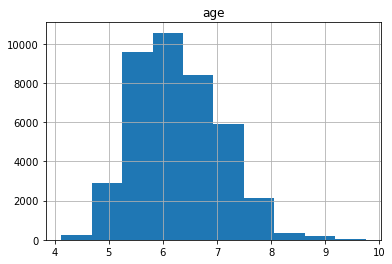

In [45]:
discretization.hist();

<h5>After Discretization</h5>

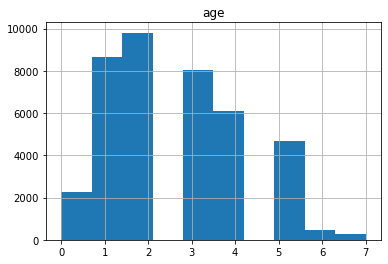

In [46]:
df_discretized.hist();

In [47]:
df_new

,age,y,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,x6_jul,x6_jun,x6_mar,x6_may,x6_nov,x6_oct,x6_sep,x7_failure,x7_nonexistent,x7_success
0,3.0,0,-0.780430,0.191417,-0.383474,0.833081,-0.253281,1.028119,0.762898,0.842105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.0,0,-0.780430,0.191417,-0.383474,-0.143234,-0.681817,-0.304475,0.214342,0.379417,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1,0.404871,-5.224430,3.297172,-1.184638,0.819815,0.192424,-1.702691,-2.479326,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,0,-0.109756,0.191417,-0.383474,-1.249725,-0.901354,-1.456379,-1.309035,-0.988642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,1,-0.780430,-5.240793,2.219136,-1.965690,-2.436356,2.089676,-1.621164,-1.308855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40735,NaN,0,0.838721,0.191417,2.219136,-1.249725,-1.221000,-1.253102,-1.389979,-0.988642,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40736,NaN,0,-0.780430,0.191417,-0.383474,0.833081,1.539896,-0.259303,0.706412,0.842105,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40737,NaN,1,-0.109756,0.191417,-0.383474,0.637818,0.712681,0.960360,0.702918,0.310903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
40738,NaN,0,0.404871,0.191417,-0.383474,0.637818,0.712681,0.960360,0.701171,0.310903,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


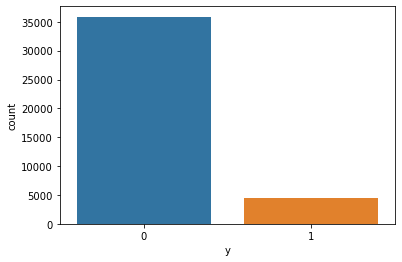

In [48]:
df_new['y'].value_counts()
sns.countplot(x='y', data=df_new)
plt.show()

<h1>Slpiting the dataset</h1>

In [49]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

df_new=df_new.dropna(axis=0)
df_new=df_new.reset_index(drop=True)
features_df= df_new.drop('y', 1)
target = pd.DataFrame(df_new['y'], columns=["y"])


X_class_train, X_test, y_class_train, y_test = train_test_split(features_df, target, test_size = 0.3, random_state = 0)

data_X, data_y = os.fit_resample(X_class_train, y_class_train)

smoted_X = pd.DataFrame(data=data_X,columns=features_df.columns )
smoted_y= pd.DataFrame(data=data_y,columns=['y'])

#reset index

X_train=smoted_X
y_train = smoted_y

X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

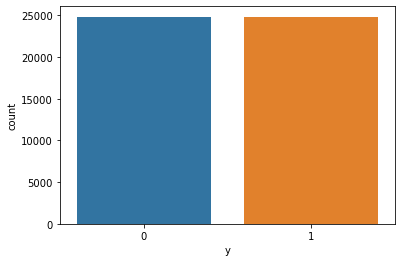

In [50]:
sns.countplot(x='y', data=smoted_y)
plt.show()

In [51]:
X_train.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,contact,...,x6_jul,x6_jun,x6_mar,x6_may,x6_nov,x6_oct,x6_sep,x7_failure,x7_nonexistent,x7_success
0,5.0,-0.109756,0.191417,-0.383474,0.833081,0.579203,-0.462580,0.760569,0.842105,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,-0.780430,0.191417,-0.383474,-0.794111,1.072721,0.711910,-1.611265,-2.862384,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,-0.109756,0.191417,-0.383474,-1.249725,-1.221000,-1.253102,-1.350380,-0.988642,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,-0.780430,0.191417,-0.383474,0.833081,-0.253281,1.028119,0.765810,0.842105,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,0.404871,0.191417,-0.383474,0.833081,1.539896,-0.259303,0.760569,0.842105,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h1><br/><br/>Feature Engineering<br/></h1>

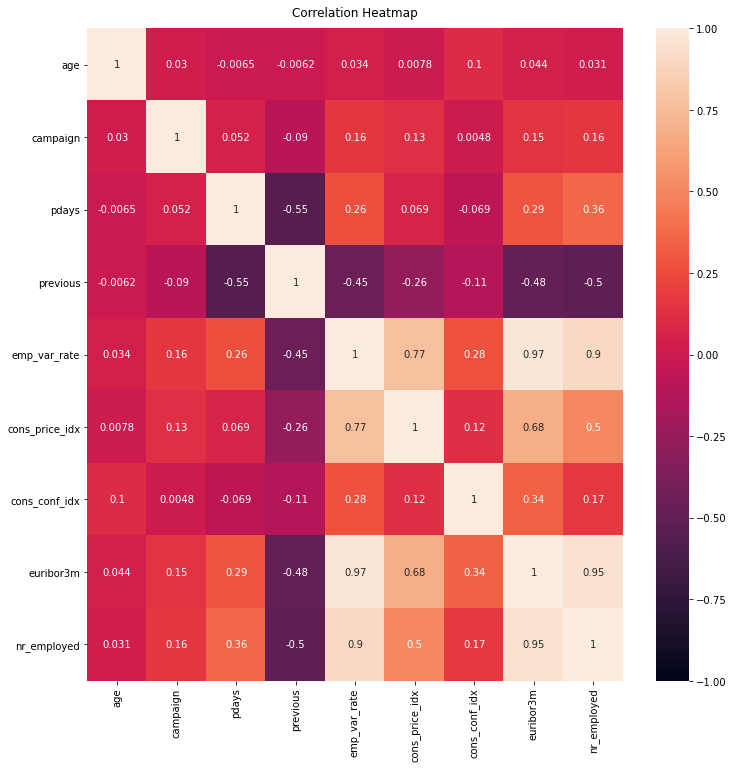

In [52]:
cols=['age', 'campaign', 'pdays', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
X_train_feature=X_train[cols]
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(X_train_feature.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<h4>Here from the heatmap we can able to see that there is strong corelation between,</h4>
<ul>
    <li>nr_employed</li>
    <li>euribor3m</li>
    <li>cons_price_idx</li>
    <li>emp_var_rate</li>
</ul>
<h4>So these can be identified as dependent fetures</h4>

                       y       age  campaign     pdays  previous  \
y               1.000000 -0.021222 -0.015588  0.005150 -0.007936   
age            -0.021222  1.000000  0.030400 -0.006525 -0.006246   
campaign       -0.015588  0.030400  1.000000  0.051883 -0.090374   
pdays           0.005150 -0.006525  0.051883  1.000000 -0.553195   
previous       -0.007936 -0.006246 -0.090374 -0.553195  1.000000   
emp_var_rate   -0.005135  0.033530  0.163604  0.261384 -0.453113   
cons_price_idx  0.005054  0.007758  0.126127  0.068611 -0.255788   
cons_conf_idx  -0.003800  0.103437  0.004823 -0.068689 -0.107789   
euribor3m      -0.007652  0.043787  0.147599  0.288525 -0.477438   
nr_employed    -0.010085  0.030977  0.157392  0.360561 -0.502416   

                emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
y                  -0.005135        0.005054      -0.003800  -0.007652   
age                 0.033530        0.007758       0.103437   0.043787   
campaign            0.163604 

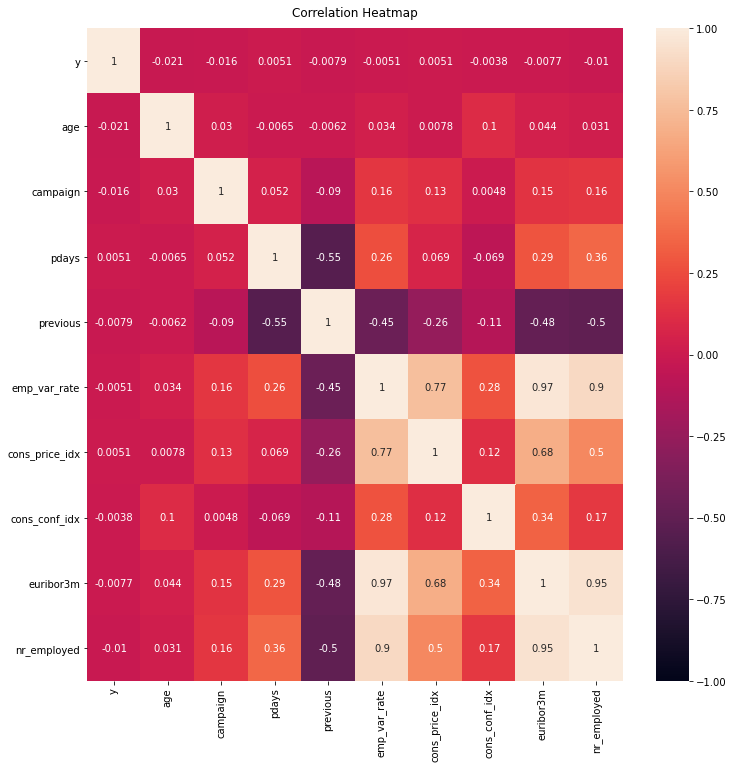

In [53]:
#test the signifncance of the continuous features
d_data = pd.concat([y_train,X_train[cols]], axis=1, join="inner")
print(d_data.corr())
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(d_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<h4>since emp_var_rate,cons_price_idx,euribor3m and nr_employed are dependent continous features we can keep the feature with highest corelation and drop the other 3<br/></h4>

In [54]:
X_train = X_train.drop('emp_var_rate', 1)
X_train = X_train.drop('cons_price_idx', 1)
X_train = X_train.drop('euribor3m', 1)

X_test = X_test.drop('emp_var_rate', 1)
X_test = X_test.drop('cons_price_idx', 1)
X_test = X_test.drop('euribor3m', 1)

<h1><br/>Apply PCA<br/></h1>

In [55]:
from sklearn.decomposition import PCA

# see explained variance ratios
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.95978614e-01, 1.72359985e-01, 8.99037335e-02, 8.13579958e-02,
       4.92987880e-02, 4.42477337e-02, 4.03933135e-02, 3.45848999e-02,
       3.03098566e-02, 2.46452646e-02, 2.15532266e-02, 2.07781212e-02,
       1.98795222e-02, 1.91709554e-02, 1.60840331e-02, 1.40237428e-02,
       1.20178696e-02, 1.13364034e-02, 1.11265032e-02, 8.93537386e-03,
       8.70360388e-03, 7.82637307e-03, 7.25940291e-03, 6.62016139e-03,
       5.97581936e-03, 5.53713780e-03, 5.08094143e-03, 4.92404814e-03,
       4.23152156e-03, 3.78323641e-03, 3.30810523e-03, 3.06166977e-03,
       2.77849247e-03, 2.36960046e-03, 2.28079928e-03, 2.11513232e-03,
       1.92152293e-03, 1.60082830e-03, 1.13553534e-03, 6.91860183e-04,
       5.83659385e-04, 1.85274779e-04, 3.14168943e-05, 7.92100950e-06,
       3.86499667e-32, 1.92885331e-33, 1.92885331e-33, 1.92885331e-33,
       1.92885331e-33, 1.92885331e-33, 1.92885331e-33, 1.92885331e-33,
       1.92885331e-33])

<h5>Select the eigenvector value greater than 95% and get the number of components</h5>

In [56]:
arr = pca.explained_variance_ratio_

sum = 0
length = len(pca.explained_variance_ratio_)
for i in range(length):
    if sum>0.95:
        break
    else:
        sum+=arr[i]
n_com=i
print('sum ',sum)
print(n_com)

sum  0.9543712962995228
25


<h5>Transform X_train and X_test after fitting the PCA into X_train parameters </h5>

In [57]:
pca = PCA(n_components = n_com)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


<h4>SVM model fitted to X_train_pca</h4>

In [58]:
#Import svm model
from sklearn import svm

svc = svm.SVC(kernel='rbf', C=1000,gamma=0.01).fit(X_train_pca, y_train)



<h4>Get the Y-Prediction</h4>

In [59]:
#Predict the response for test dataset
y_pred = svc.predict(X_test_pca)
print(y_pred)

[0 0 0 ... 0 0 0]


<h3>Evaluation</h3>

<h4>Create Confustion Matrix</h4>

<Figure size 576x576 with 0 Axes>

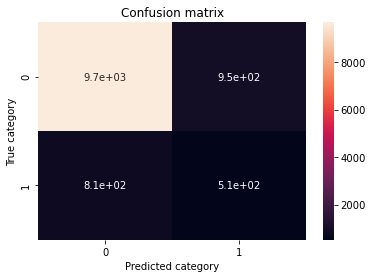

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(1)
ax = sns.heatmap(cm, ax=ax, annot=True) #normalize='all'
plt.title('Confusion matrix')
plt.ylabel('True category')
plt.xlabel('Predicted category')
plt.show()

<h5>Get Classification Report</h5>

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     10634
           1       0.35      0.39      0.37      1323

    accuracy                           0.85     11957
   macro avg       0.64      0.65      0.64     11957
weighted avg       0.86      0.85      0.86     11957



<h4>Accuracy and Precision</h4>

In [62]:
from sklearn.metrics import precision_score, accuracy_score

print('Precesion on evaluation set', precision_score(y_test, y_pred))
print('Accuracy score', accuracy_score(y_test, y_pred))

Precesion on evaluation set 0.3496932515337423
Accuracy score 0.8524713556912269
